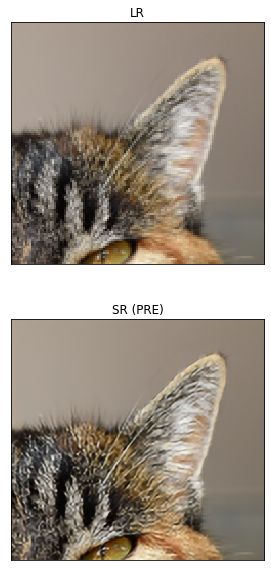

In [8]:
import os
import matplotlib.pyplot as plt

from data import DIV2K
from model.srgan import generator, discriminator
from train import SrganTrainer, SrganGeneratorTrainer
from model import resolve_single
from utils import load_image
# Location of model weights (needed for demo)
weights_dir = 'weights/my-srgan'
weights_file = lambda filename: os.path.join(weights_dir, filename)

os.makedirs(weights_dir, exist_ok=True)
pre_generator = generator()
pre_generator.load_weights(weights_file('pre_generator.h5'))

def resolve_and_plot(lr_image_path):
    lr = load_image(lr_image_path)
    
    pre_sr = resolve_single(pre_generator, lr)

    
    plt.figure(figsize=(10, 10))
    
    images = [lr, pre_sr]
    titles = ['LR', 'SR (PRE)']
    positions = [1, 3]
    
    for i, (img, title, pos) in enumerate(zip(images, titles, positions)):
        plt.subplot(2, 2, pos)
        plt.imshow(img)
        plt.title(title)
        plt.xticks([])
        plt.yticks([])


resolve_and_plot('demo/0869x4-crop.png')